In [1]:
import pandas as pd
import numpy as np
from py2neo import Graph
from neo4j import GraphDatabase, basic_auth

In [2]:
uri = 'bolt://localhost:7687'
user = 'neo4j'
pwd = '1234'

graph = Graph(uri, auth=('neo4j', pwd))
driver = GraphDatabase.driver(uri, auth = basic_auth(user,pwd))

In [4]:
re = graph.run('Match (img1:Image) Match (img2:Image) WHERE img1.uri <> img2.uri RETURN img1.uri, img2.uri, img1.name, img2.name, gds.similarity.euclideanDistance(img1.embedding,img2.embedding) as dist ORDER BY dist ASC LIMIT 5')
re.data()

[{'img1.uri': 'http://rdf.freebase.com/ns/m.01k7d9',
  'img2.uri': 'http://rdf.freebase.com/ns/m.04yywz',
  'img1.name': 'img_662.jpg',
  'img2.name': 'img_651.jpg',
  'dist': 0.5203648613879917},
 {'img1.uri': 'http://rdf.freebase.com/ns/m.04yywz',
  'img2.uri': 'http://rdf.freebase.com/ns/m.01k7d9',
  'img1.name': 'img_651.jpg',
  'img2.name': 'img_662.jpg',
  'dist': 0.5203648613879917},
 {'img1.uri': 'http://rdf.freebase.com/ns/m.04yywz',
  'img2.uri': 'http://rdf.freebase.com/ns/m.02r0csl',
  'img1.name': 'img_651.jpg',
  'img2.name': 'img_491.jpg',
  'dist': 0.5440479323206607},
 {'img1.uri': 'http://rdf.freebase.com/ns/m.02r0csl',
  'img2.uri': 'http://rdf.freebase.com/ns/m.04yywz',
  'img1.name': 'img_491.jpg',
  'img2.name': 'img_651.jpg',
  'dist': 0.5440479323206607},
 {'img1.uri': 'http://rdf.freebase.com/ns/m.05vsxz',
  'img2.uri': 'http://rdf.freebase.com/ns/m.01k7d9',
  'img1.name': 'img_267.jpg',
  'img2.name': 'img_662.jpg',
  'dist': 0.5612125761255891}]

In [36]:
result = graph.run('Match (a:Resource) WHERE a.uri = "http://rdf.freebase.com/ns/m.01k7d9" RETURN a.name as name')
entity_name_1 = result.evaluate()
result = graph.run('Match (a:Resource) WHERE a.uri = "http://rdf.freebase.com/ns/m.04yywz" RETURN a.name as name')
entity_name_2 = result.evaluate()

Ray Walston


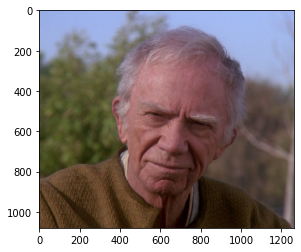

Burt Young


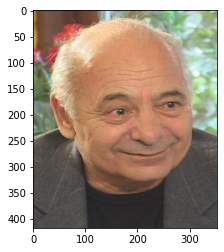

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(entity_name_1)
path = 'D:\\RMBI_MMKG_data\\Bulk-Bing-Image-downloader\\' + entity_name_1 + '\\img_662.jpg'
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()

print(entity_name_2)
path = 'D:\\RMBI_MMKG_data\\Bulk-Bing-Image-downloader\\' + entity_name_2 + '\\img_651.jpg'
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.show()